# Install libraries

In [ ]:
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install accelerate --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 10.0 MB/s eta 0:00:00
 

# Dataset

---


I downloaded the [COVID-19 tweets dataset](https://www.kaggle.com/datasets/arunavakrchakraborty/covid19-twitter-dataset?select=Covid-19+Twitter+Dataset+%28Aug-Sep+2020%29.csv) in English from Kaggle and uploaded it into my Google Drive. I mounted Google Drive into this notebook.

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Path to the dataset in Google Drive
file_path = '/content/drive/MyDrive/Computational_Linguistics/Final_Project/Covid-19_Twitter_Dataset_Apr-Jun_2020.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the dataset using pandas
dataset = pd.read_csv(file_path)

# Inspect the dataset
print(dataset.head(6))

# Select the first 2000 rows
filtered_dataset = dataset.dropna().head(2000)

             id  created_at  \
0  1.250000e+18  2020-04-19   
1  1.250000e+18  2020-04-19   
2  1.250000e+18  2020-04-19   
3  1.250000e+18  2020-04-19   
4  1.250000e+18  2020-04-19   
5  1.250000e+18  2020-04-19   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/android" ...   
5  <a href="http://twitter.com/download/iphone" r...   

                                       original_text lang  favorite_count  \
0  RT @GlblCtzn: .@priyankachopra is calling on l...   en             0.0   
1  RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...   en             0.0   
2  RT @AdvoBarryRoux: These 5 police officials ba...   en             0.0   
3  RT @MobilePunch: COVID-19: Oyo discharges two ...   en             0.0   
4  M

In [ ]:
# Filtering columns for saving computational power

# Keep only the necessary columns
filtered_dataset = filtered_dataset[["clean_tweet", "sentiment"]]

# Inspect the filtered dataframe
print(filtered_dataset.head(10))

# Save the reduced dataset to a new CSV file (optional)
filtered_dataset.to_csv('/content/drive/MyDrive/Computational_Linguistics/Final_Project/filtered_covid_tweets_Aug-Sep_2020.csv', index=False)
print("\nFiltered dataset saved as 'filtered_covid_tweets_Aug-Sep_2020.csv' in Drive")

                                          clean_tweet sentiment
7   break new york woman symptom die last week pre...       neg
13     prevent key know simpl step take today protect       pos
16  iphrc condemn unrel viciou campaign malign mus...       neg
21  mila launch quarantin wine profit go covid19 r...       pos
22    covid19 alberta doctor slam provinc shoddi mask       neg
42  volunt work help other share tip stay healthi ...       pos
61        mani left say proven claim right system gov       neu
62  peopl lose job due reduc incom may make child ...       neg
68    sens week transit freak covid19 number back get       neg
75  confus seizur stroke may affect brain beyond f...       neu

Filtered dataset saved as 'filtered_covid_tweets_Aug-Sep_2020.csv' in Drive


In [ ]:
print(type(filtered_dataset))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Rename columns in the DataFrame
def rename_columns(df):
    df = df.rename(columns={"clean_tweet": "text", "sentiment": "labels"})
    return df

filtered_renamed_dataset = rename_columns(filtered_dataset)
print(filtered_renamed_dataset.head(5))

                                                 text labels
7   break new york woman symptom die last week pre...    neg
13     prevent key know simpl step take today protect    pos
16  iphrc condemn unrel viciou campaign malign mus...    neg
21  mila launch quarantin wine profit go covid19 r...    pos
22    covid19 alberta doctor slam provinc shoddi mask    neg


In [ ]:
# Maps sentiment string labels in a specified column of a DataFrame to numerical values: "neg" -> 0, "neu" -> 1, "pos" -> 2.

def map_sentiment_labels(dataset, column_name):
    # Ensure the column exists before accessing it
    if column_name not in dataset.columns:
        # If using a previous version, try accessing the old column name
        # assuming old column name is "sentiment"
        column_name = 'sentiment' # Change 'old_column_name' if necessary

    label_mapping = {"neg": 0, "neu": 1, "pos": 2}
    dataset[column_name] = dataset[column_name].replace(label_mapping)

    # Rename the column after mapping if needed
    dataset = dataset.rename(columns={column_name: "labels"})

    return dataset # Returns a DataFrame with updated column

ready_dataset = map_sentiment_labels(filtered_renamed_dataset, "labels")
print(ready_dataset[:15])

                                                  text  labels
7    break new york woman symptom die last week pre...       0
13      prevent key know simpl step take today protect       2
16   iphrc condemn unrel viciou campaign malign mus...       0
21   mila launch quarantin wine profit go covid19 r...       2
22     covid19 alberta doctor slam provinc shoddi mask       0
42   volunt work help other share tip stay healthi ...       2
61         mani left say proven claim right system gov       1
62   peopl lose job due reduc incom may make child ...       0
68     sens week transit freak covid19 number back get       0
75   confus seizur stroke may affect brain beyond f...       1
84                    posit news stori may miss author       0
96   goosebump show support global health one world...       2
117  million covid19 relief power impact one world ...       2
125                    sorri gave covid19 thought hoax       0
145  ye absolut get nerv undermin bori gvt trust bo... 

<ipython-input-7-f2a76a2a1928>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[column_name] = dataset[column_name].replace(label_mapping)


# First Model: DistilBERT

---



## Tokenizer

In [ ]:
from transformers import AutoTokenizer

# Load the DistilBERT tokenizer
distilbert_tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

# Print tokenizer
print(f"Tokenizer Loaded:", distilbert_tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Tokenizer Loaded: DistilBertTokenizerFast(name_or_path='distilbert/distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)


In [ ]:
# Testing the tokenizer on a sample input - Warning: PyTorch tensor returned!
sample_text = "The COVID-19 vaccine rollout has been fantastic!"

sample_distilbert_tokenized = distilbert_tokenizer(sample_text, padding=True, truncation=True, return_tensors="pt")

# Print the results
print("DistilBERT sample input Tokenized:", sample_distilbert_tokenized)

DistilBERT sample input Tokenized: {'input_ids': tensor([[  101,  1996,  2522, 17258,  1011,  2539, 17404,  4897,  5833,  2038,
          2042, 10392,   999,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
print(type(ready_dataset))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(ready_dataset.head())

                                                 text  labels
7   break new york woman symptom die last week pre...       0
13     prevent key know simpl step take today protect       2
16  iphrc condemn unrel viciou campaign malign mus...       0
21  mila launch quarantin wine profit go covid19 r...       2
22    covid19 alberta doctor slam provinc shoddi mask       0


In [ ]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

# 1. Create a Hugging Face Dataset from your DataFrame
hf_dataset = Dataset.from_pandas(ready_dataset)

# 2. Split the dataset into train, validation, and test sets
train_testvalid = hf_dataset.train_test_split(test_size=0.2)  # 80% train, 20% test+validation
test_valid = train_testvalid['test'].train_test_split(test_size=0.5) # Split the 20% into 10% test and 10% validation

# 3. Create the DatasetDict
hugface_dataset_dict = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'validation': test_valid['train']
})

print(type(hugface_dataset_dict))  # Should output: <class 'datasets.dataset_dict.DatasetDict'>

<class 'datasets.dataset_dict.DatasetDict'>


In [ ]:
print(hugface_dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 200
    })
    validation: Dataset({
        features: ['text', 'labels', '__index_level_0__'],
        num_rows: 200
    })
})


In [ ]:
from pprint import pprint
print(type(hugface_dataset_dict))
pprint(hugface_dataset_dict['train'][:10])

<class 'datasets.dataset_dict.DatasetDict'>
{'__index_level_0__': [15421,
                       11240,
                       3274,
                       10359,
                       9608,
                       11156,
                       3544,
                       14678,
                       6398,
                       7693],
 'labels': [0, 1, 1, 2, 2, 1, 1, 0, 2, 2],
 'text': ['man anoth tweet make realli question doubt viru long',
          'greec illeg migrant test posit covid19 hotel shelter',
          'western cape new covid19 case leader hotspot district http',
          'tim tomorrow support game tenni improvis garden',
          'face challeng show strong leadership dedic commit ensur everi',
          'watch hon ble pm ji tomorrow discuss situat',
          'nation grappl uncertainti amid chairman encoura',
          'blow everi month crisi drag folk pay rent mortgag',
          'take short survey nc covid19 respons want hear thought conven next '
          'week'

In [ ]:
def tokenize_function(examples):
    tokenized_examples = {
        "attention_mask": [],
        "input_ids": [],
        "labels": []
    }

    for text, label in zip(examples["text"], examples["labels"]):  # Assuming the "text" column is still there
        tokenized = distilbert_tokenizer(text, padding=True, truncation=True, max_length=512)
        tokenized_examples["attention_mask"].append(tokenized["attention_mask"])
        tokenized_examples["input_ids"].append(tokenized["input_ids"])
        tokenized_examples["labels"].append(label)

    return tokenized_examples

In [ ]:
tokenized_dataset = hugface_dataset_dict.map(tokenize_function, batched=True, batch_size=16)

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
print(type(tokenized_dataset))
pprint(tokenized_dataset['train'][:3])

<class 'datasets.dataset_dict.DatasetDict'>
{'__index_level_0__': [15421, 11240, 3274],
 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 'input_ids': [[101,
                2158,
                2019,
                14573,
                1056,
                28394,
                2102,
                2191,
                2613,
                3669,
                3160,
                4797,
                6819,
                6820,
                2146,
                102],
               [101,
                24665,
                4402,
                2278,
                5665,
                13910,
                20731,
                3231,
                13433,
                28032,
                2522,
                17258,
                16147,
                3309,
                7713,
               

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=distilbert_tokenizer)

In [ ]:
# AFTER TOKENIZATION
# Remove raw text column, because we do not need it anymore
tokenized_dataset = tokenized_dataset.remove_columns(["text"])

# Do not set the format to "torch", we will be working with Hugging Face Trainer

In [ ]:
print(type(tokenized_dataset))
pprint(tokenized_dataset['train'][:3])

<class 'datasets.dataset_dict.DatasetDict'>
{'__index_level_0__': [8674, 2092, 11810],
 'attention_mask': [[1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1],
                    [1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 'input_ids': [[101,
                2678,
                2501,
                6752,
                8490,
                16260,
                6583,
                19722,
                2050,
                3817,
                5035,
                2365,
                7173,
                8754,
   

## Model

---



In [ ]:
from transformers import AutoModelForSequenceClassification

# Load the pre-trained DistilBERT model for sequence classification
distilbert_model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased", num_labels=3) # positive, negative, neutral

print("Model Loaded:", distilbert_model)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model Loaded: DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, i

## Training

**Goal of training a language model:**

Learn the general patterns and rules of a language from large datasets. We are using already pre-trained transformer model [DistilBERT](https://huggingface.co/distilbert/distilbert-base-uncased) which was pretrained on the same corpus in a self-supervised fashion, using the BERT base model as a teacher. This means it was pretrained on the raw texts only, with no humans labelling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts using the BERT base model.

### Training with Hugging Face Trainer

In [ ]:
# THE MAGIC HAPPENS IN THIS CELL:
import numpy as np
import evaluate
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification

# Loading the pretrained model; number of labels: 3
distilbert_model = AutoModelForSequenceClassification.from_pretrained('distilbert/distilbert-base-uncased', num_labels=3)

# Loading the accuracy metrics from the library "evaluate"
accuracy = evaluate.load("accuracy")

# Configuration class for specifying hyperparameters for training and evaluation
arguments = TrainingArguments(
    output_dir="/content/drive/MyDrive/Computational_Linguistics/Final_Project/DistilBERT", # output directory
    per_device_train_batch_size=20, # how many samples the model sees at once
    per_device_eval_batch_size=20,
    # logging_steps: training steps per epoch = training samples / batch size
    logging_steps=10, # log every 10 steps --> for 80 steps per epoch, log 8 times per epoch
    num_train_epochs=5, # passes over the whole dataset
    eval_strategy="epoch", # run validation at the end of each epoch
    save_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    report_to='none',
    seed=224
)

def compute_metrics(eval_pred):
    """Called at the end of validation. Gives accuracy"""
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    # calculates the accuracy
    return accuracy.compute(predictions=predictions, references=labels)

# the class Trainer
trainer = Trainer(
    model=distilbert_model, # our model
    args=arguments, # our parameters we set
    train_dataset=tokenized_dataset['train'], # the dataset that it's supposed to use
    eval_dataset=tokenized_dataset['validation'], # testing on the validation set
    processing_class=distilbert_tokenizer,
    data_collator=data_collator, # processing method
    compute_metrics=compute_metrics # how the evaluation metrics is supposed to be computed
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.847000,0.808047,0.690000
2,0.496000,0.581744,0.740000
3,0.334800,0.515047,0.805000
4,0.196900,0.528171,0.805000
5,0.156300,0.537333,0.815000


TrainOutput(global_step=400, training_loss=0.44609282970428465, metrics={'train_runtime': 67.7337, 'train_samples_per_second': 118.11, 'train_steps_per_second': 5.905, 'total_flos': 47197526964840.0, 'train_loss': 0.44609282970428465, 'epoch': 5.0})

In [ ]:
results = trainer.predict(tokenized_dataset['validation'])
print(results)

PredictionOutput(predictions=array([[-1.5765533 , -0.7555423 ,  1.7489574 ],
       [-1.5798848 ,  0.06728838,  1.0981131 ],
       [-1.2754141 , -1.1860589 ,  1.874359  ],
       [-1.8316431 ,  0.94263476,  0.47640678],
       [-1.5364244 , -1.4068189 ,  2.537137  ],
       [-1.9112397 ,  1.548315  , -0.23965359],
       [-2.1796045 ,  1.3544703 ,  0.24777049],
       [-1.5209439 ,  0.9098658 , -0.00861012],
       [-1.2436526 , -1.3846768 ,  2.308434  ],
       [-1.5307474 ,  1.9904102 , -1.3739529 ],
       [-1.9204172 ,  0.16601218,  1.1618987 ],
       [ 1.8391582 , -1.0003911 , -1.4699256 ],
       [-0.9501339 ,  1.8632778 , -1.7676965 ],
       [-1.8433834 ,  2.0536296 , -0.9823721 ],
       [-1.3353491 , -1.4464204 ,  2.460594  ],
       [ 2.008997  , -1.3754652 , -1.0061798 ],
       [ 1.8333633 , -1.4480343 , -0.9168388 ],
       [-1.641361  , -1.3184059 ,  2.511659  ],
       [ 1.5223029 , -0.78881454, -1.2940403 ],
       [ 1.9631306 , -1.4318562 , -0.9911986 ],
       [ 1.

### Saving the fine-tuned model

In [ ]:
# Saving epoch 3 - checkpoint-240:
# /content/drive/MyDrive/Computational_Linguistics/Final_Project/DistilBERT/best_distilbert/checkpoint-240

In [ ]:
# Saving a cpecific epoch manually
import os

# Define a directory in Google Drive to save the model
epoch_save_dir = "/content/drive/MyDrive/Computational_Linguistics/Final_Project/DistilBERT/best_distilbert/epoch_3"

# Save the model at the end of the XY epoch -> correct the directory with the right epoch
distilbert_finetuned = distilbert_model.save_pretrained(epoch_save_dir)

print(f"Model saved at {epoch_save_dir}")

Model saved at /content/drive/MyDrive/Computational_Linguistics/Final_Project/DistilBERT/best_distilbert/epoch_3


## Fine-Tuning

### Fine-Tuning with Optuna

**Goal of fine-tuning**

Adapt the pre-trained model to a specific task - sentiment analysis, using a smaller, task-specific dataset. We want to improve the model’s task-specific performance without retraining it from scratch. Therefore we want to find the best combination of hyperparameters in order to refine the model for optimal performance.

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.6 MB/s eta 0:00:00


In [ ]:
import optuna

def objective(trial):
    # Suggest hyperparameters using trial.suggest_* methods
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True)
    batch_size = trial.suggest_categorical("batch_size", [8, 16, 20, 40])
    num_train_epochs = trial.suggest_int("num_train_epochs", 3, 10)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True) # Weight decay to regularize the model
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5) # Dropout rate for regularization
    #adam_epsilon = trial.suggest_loguniform("adam_epsilon", 1e-8, 1e-6) # Epsilon value for Adam optimizer
    per_device_train_batch_size = trial.suggest_categorical("per_device_train_batch_size", [8, 16, 20, 40])
    per_device_eval_batch_size = trial.suggest_categorical("per_device_eval_batch_size", [8, 16, 20, 40])
    warmup_steps = trial.suggest_int("warmup_steps", 0, 500)

    distilbert_model.config.attention_probs_dropout_probs = dropout_rate
    distilbert_model.config.hidden_dropout_prob = dropout_rate

    # Update TrainingArguments with suggested hyperparameters
    training_args = TrainingArguments(
        output_dir=f"/content/drive/MyDrive/Computational_Linguistics/Final_Project/DistilBERT/results_trial_{trial.number}",
        per_device_train_batch_size=per_device_train_batch_size,
        per_device_eval_batch_size=per_device_eval_batch_size, # use same batch for evaluation
        logging_steps=10, # adjust to log every 10 steps
        num_train_epochs=num_train_epochs,
        eval_strategy="epoch", # evaluate at the end of each epoch
        save_strategy="epoch", # save checkpoint at the end of each epoch
        learning_rate=learning_rate,
        weight_decay=weight_decay,
        #adam_epsilon=adam_epsilon,
        load_best_model_at_end=True,
        report_to='none', # disable reporting to external tools
        seed=224
    )

    # Create and train the Trainer
    trainer = Trainer(
        model=distilbert_model,  # our pre-trained DistilBERT model
        args=training_args,
        train_dataset=tokenized_dataset["train"],
        eval_dataset=tokenized_dataset["validation"],
        processing_class=distilbert_tokenizer, #
        data_collator=data_collator,
        compute_metrics=compute_metrics,  # Assuming you have a compute_metrics function
        #callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
    )

    train_results = trainer.train()

    # Evaluate the model and return the metric to optimize
    eval_results = trainer.evaluate()
    return eval_results["eval_accuracy"]  # Replace with your desired metric

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

study = optuna.create_study(direction="maximize")  # Maximize accuracy
study.optimize(objective, n_trials=10)  # Run 100 trials

# Print the best hyperparameters and score
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2025-01-27 10:15:25,754] A new study created in memory with name: no-name-4a6ce234-ad4e-408e-8a1f-53934e112ee8


Epoch,Training Loss,Validation Loss,Accuracy
1,0.157900,0.700816,0.815000
2,0.215100,0.769891,0.805000
3,0.103800,0.798260,0.825000
4,0.077800,0.835755,0.835000
5,0.016100,0.874586,0.835000
6,0.028400,0.913010,0.830000
7,0.002400,0.908207,0.825000
8,0.007100,0.913130,0.830000


[I 2025-01-27 10:17:03,521] Trial 0 finished with value: 0.815 and parameters: {'learning_rate': 3.023128618968985e-05, 'batch_size': 20, 'num_train_epochs': 8, 'weight_decay': 0.006517115546668342, 'dropout_rate': 0.308375790303556, 'per_device_train_batch_size': 20, 'per_device_eval_batch_size': 8, 'warmup_steps': 811}. Best is trial 0 with value: 0.815.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.199000,0.880428,0.815000
2,0.170300,1.009849,0.820000
3,0.001900,1.036699,0.835000
4,0.088500,1.206017,0.830000
5,0.020800,1.119844,0.845000
6,0.000500,1.106073,0.850000
7,0.000400,1.158072,0.845000
8,0.000400,1.249982,0.840000
9,0.059800,1.164964,0.845000
10,0.000300,1.112878,0.855000


[I 2025-01-27 10:19:55,524] Trial 1 finished with value: 0.815 and parameters: {'learning_rate': 2.6908018909445042e-05, 'batch_size': 20, 'num_train_epochs': 10, 'weight_decay': 2.6053943030994394e-06, 'dropout_rate': 0.3392031929658266, 'per_device_train_batch_size': 8, 'per_device_eval_batch_size': 20, 'warmup_steps': 162}. Best is trial 0 with value: 0.815.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.071100,0.860518,0.850000
2,0.045900,0.867499,0.840000
3,0.032000,0.844735,0.850000


[I 2025-01-27 10:20:45,212] Trial 2 finished with value: 0.85 and parameters: {'learning_rate': 1.210713720192683e-05, 'batch_size': 40, 'num_train_epochs': 3, 'weight_decay': 7.6264012860310795e-06, 'dropout_rate': 0.4145030088092857, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 20, 'warmup_steps': 372}. Best is trial 2 with value: 0.85.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.061900,0.748953,0.840000
2,0.057200,0.980042,0.815000
3,0.014000,0.847609,0.840000
4,0.014400,0.902682,0.845000
5,0.007400,0.821251,0.865000
6,0.007000,0.868941,0.855000
7,0.001100,0.835623,0.855000


[I 2025-01-27 10:22:17,991] Trial 3 finished with value: 0.84 and parameters: {'learning_rate': 3.616917493837943e-05, 'batch_size': 8, 'num_train_epochs': 7, 'weight_decay': 3.891409998011932e-06, 'dropout_rate': 0.4986001019691044, 'per_device_train_batch_size': 40, 'per_device_eval_batch_size': 16, 'warmup_steps': 1754}. Best is trial 2 with value: 0.85.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.007000,1.039959,0.820000
2,0.036500,1.090367,0.815000
3,0.000700,1.067208,0.845000
4,0.051000,1.082567,0.830000
5,0.000800,1.082097,0.850000
6,0.000400,1.068568,0.830000
7,0.000300,1.087223,0.850000
8,0.000300,1.076278,0.850000
9,0.027500,1.102056,0.845000
10,0.000300,1.143928,0.850000


[I 2025-01-27 10:24:52,569] Trial 4 finished with value: 0.82 and parameters: {'learning_rate': 1.7319736531366432e-05, 'batch_size': 40, 'num_train_epochs': 10, 'weight_decay': 0.0031755570258618928, 'dropout_rate': 0.10401574805272862, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 16, 'warmup_steps': 309}. Best is trial 2 with value: 0.85.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.000900,1.120833,0.850000
2,0.075400,1.444819,0.795000
3,0.000500,1.380608,0.810000
4,0.015800,1.306358,0.810000


[I 2025-01-27 10:25:55,671] Trial 5 finished with value: 0.85 and parameters: {'learning_rate': 2.8018620424459825e-05, 'batch_size': 8, 'num_train_epochs': 4, 'weight_decay': 0.0010483594829593975, 'dropout_rate': 0.3078503214865912, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 16, 'warmup_steps': 1732}. Best is trial 2 with value: 0.85.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.000400,1.301862,0.845000
2,0.068000,1.368985,0.850000
3,0.002600,1.438166,0.800000
4,0.000100,1.273338,0.850000


[W 2025-01-27 10:26:53,802] Trial 6 failed with parameters: {'learning_rate': 1.1994699176620035e-05, 'batch_size': 20, 'num_train_epochs': 10, 'weight_decay': 1.7896631144213182e-05, 'dropout_rate': 0.3188000725997706, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 20, 'warmup_steps': 4491} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-27-b462ff26d9d8>", line 47, in objective
    train_results = trainer.train()
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 2164, in train
    return inner_training_loop(
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 2524, in _inner_training_loop
    tr_loss_step = self.traini

KeyboardInterrupt: 

## Evaluation on the Test Set

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, classification_report

def compute_metrics_test(eval_pred):
    predictions, labels = eval_pred
    # Get predicted class by taking the argmax of logits
    preds = predictions.argmax(axis=1)

    # Calculate metrics
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="macro")  # Use "macro" for multi-class F1
    mcc = matthews_corrcoef(labels, preds)

    # Print the classification report (optional, for detailed analysis)
    print("\nClassification Report:\n", classification_report(labels, preds, target_names=["Negative", "Neutral", "Positive"]))

    return {
        "accuracy": accuracy,
        "f1": f1,
        "mcc": mcc
    }


In [ ]:
# TESTING DISTILBERT ON THE WHOLE TEST SET (200 samples):

# Reload the saved model
model_path_distilbert = "/content/drive/MyDrive/Computational_Linguistics/Final_Project/DistilBERT/best_distilbert/checkpoint-240"
distilbert_finetuned = AutoModelForSequenceClassification.from_pretrained(model_path_distilbert)

trainer_test_distilbert = Trainer(
    model=distilbert_finetuned, # we give our model, our arguments and out dataset to the class Trainer
    args=arguments, # these are our parameters we set
    eval_dataset=tokenized_dataset['test'], # change to test when you do your final evaluation!
    processing_class=distilbert_tokenizer,
    data_collator=data_collator, # processing method
    compute_metrics=compute_metrics_test # how the evaluation metrics is supposed to be computed
)

In [ ]:
# Evaluate the model on the test set
results_distilbert_finetuned = trainer_test_distilbert.evaluate()

# Print the results
print("Evaluation Metrics:\n", results)


Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.97      0.91        40
     Neutral       0.95      0.93      0.94        87
    Positive       0.96      0.90      0.93        73

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.93      0.93      0.93       200

Evaluation Metrics:
 {'eval_loss': 0.25121039152145386, 'eval_model_preparation_time': 0.0025, 'eval_accuracy': 0.93, 'eval_f1': 0.9261382246970192, 'eval_mcc': 0.8921665559029573, 'eval_runtime': 0.2989, 'eval_samples_per_second': 669.068, 'eval_steps_per_second': 33.453}


## Vizualization

In [ ]:
# Reload the fine-tuned model

distilbert_finetuned = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/Computational_Linguistics/Final_Project/best_distilbert/checkpoint-240")

print("Model reloaded successfully!")

Model reloaded successfully!


In [ ]:
model_inputs = distilbert_tokenizer(hugface_dataset_dict['validation']['text'], padding=True, truncation=True, return_tensors='pt')

# Get hidden states from the model
outputs = distilbert_finetuned(**model_inputs, output_hidden_states=True)

In [ ]:
import torch
import os
from torch.utils.tensorboard import SummaryWriter

# Create the directory for storing results (vizualization files for each layer)
path = "/content/drive/MyDrive/Computational_Linguistics/Final_Project/best_distilbert/results_vis" # can add/change the path here
layer=0
if not os.path.exists(path):
  os.mkdir(path)

# Iterate through layers
# Iterates through each layer in the model and creates a subdirectory (layer_XY) for storing results specific to that layer.
while layer in range(len(outputs['hidden_states'])):
  if not os.path.exists(path+'/layer_' + str(layer)):
    os.mkdir(path+'/layer_' + str(layer))

  example = 0
  tensors = []
  labels = []

  while example in range(len(outputs['hidden_states'][layer])):
    # Extract special token embeddings - extracts the embeddings for the [CLS] token (special token at the start of every sequence) for each example in the batch
    sp_token_position = 0
    for token in model_inputs['input_ids'][example]:
      if token != 101:
        sp_token_position += 1
      else:
        tensor = outputs['hidden_states'][layer][example][sp_token_position]
        tensors.append(tensor)
        break

    # Add metadata for each example, consisting of:
      # the original text: hugface_dataset_dict['validation']['text']
      # the correcponding label: hugface_dataset_dict['validation']['label']
    label = [hugface_dataset_dict['validation']['text'][example],str(hugface_dataset_dict['validation']['labels'][example])]
    labels.append(label)
    example +=1

  # Save embeddings for visualization
  # Uses SummaryWriter to save the embeddings (tensors) and metadata for TensorFlow's Embedding Projector.
  writer=SummaryWriter(path+'/layer_' + str(layer))
  writer.add_embedding(torch.stack(tensors), metadata=labels, metadata_header=['Text','Emotion'])

  layer+=1

print("Results successfully stored!")

# Second Model: BERTweet

---





## Tokenizer

In [ ]:
from pprint import pprint
print(type(hugface_dataset_dict))
pprint(hugface_dataset_dict['train'][:10])

<class 'datasets.dataset_dict.DatasetDict'>
{'__index_level_0__': [7342,
                       10353,
                       4261,
                       16929,
                       13109,
                       5527,
                       11841,
                       9906,
                       7673,
                       6036],
 'labels': [1, 2, 1, 2, 1, 1, 2, 0, 0, 0],
 'text': ['today mark world malaria day amid must sustain effort infecti '
          'diseas',
          'press confer slide april critic care bed covid19 patient uk daili '
          'cov',
          'pallet food load famili need',
          'handl import clean purif year new tomb fi',
          'digest updat compil inform topic',
          'white hous press seci nanci pelosi hinder respons covid19',
          'congratul champion phillipp donat championship awar',
          'live live descent hell chines peopl confront chines communist parti',
          'peopl die thing happen',
          'urg immedi releas du

In [ ]:
from transformers import AutoTokenizer

# Load the BERTweet tokenizer
bertweet_tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base", use_fast=False)

# Print tokenizer
print(f"Tokenizer Loaded:", bertweet_tokenizer)

config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.91M [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Tokenizer Loaded: BertweetTokenizer(name_or_path='vinai/bertweet-base', vocab_size=64000, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	64000: AddedToken("<mask>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)


In [ ]:
def tokenize_function_bertweet(examples):
    tokenized_examples = {
        "attention_mask": [],
        "input_ids": [],
        "labels": []
    }

    for text, label in zip(examples["text"], examples["labels"]):  # The "text" column is still there
        tokenized = bertweet_tokenizer(text, padding=True, truncation=True, max_length=512)
        tokenized_examples["attention_mask"].append(tokenized["attention_mask"])
        tokenized_examples["input_ids"].append(tokenized["input_ids"])
        tokenized_examples["labels"].append(label)

    return tokenized_examples

In [ ]:
print(bertweet_tokenizer("This is a test.", add_special_tokens=True))

{'input_ids': [0, 126, 17, 11, 14801, 4, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}


Compared to DistilBERT tokenizer:

In [ ]:
print(distilbert_tokenizer("This is a test."))

{'input_ids': [101, 2023, 2003, 1037, 3231, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokenized_dataset_bertweet = hugface_dataset_dict.map(tokenize_function_bertweet, batched=True, batch_size=16)

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
print(type(tokenized_dataset_bertweet))
pprint(tokenized_dataset_bertweet['train'][:3])

<class 'datasets.dataset_dict.DatasetDict'>
{'__index_level_0__': [7342, 10353, 4261],
 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 'input_ids': [[0,
                128,
                3077,
                220,
                48771,
                93,
                8986,
                445,
                30224,
                2454,
                6435,
                13737,
                37,
                1215,
                29242,
                2],
               [0,
                2289,
                10750,
                701,
                5557,
                16398,
                20406,
                356,
                424,
                1356,
                14209,
                673,
                4500,
                4272,
                2375,
                26701,
                1356

In [ ]:
from transformers import DataCollatorWithPadding, AutoTokenizer

data_collator_bertweet = DataCollatorWithPadding(tokenizer=bertweet_tokenizer)

In [ ]:
tokenized_dataset_bertweet = tokenized_dataset_bertweet.remove_columns(["text"])

In [ ]:
print(type(tokenized_dataset_bertweet))
pprint(tokenized_dataset_bertweet['train'][:3])

<class 'datasets.dataset_dict.DatasetDict'>
{'__index_level_0__': [7342, 10353, 4261],
 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 'input_ids': [[0,
                128,
                3077,
                220,
                48771,
                93,
                8986,
                445,
                30224,
                2454,
                6435,
                13737,
                37,
                1215,
                29242,
                2],
               [0,
                2289,
                10750,
                701,
                5557,
                16398,
                20406,
                356,
                424,
                1356,
                14209,
                673,
                4500,
                4272,
                2375,
                26701,
                1356

## Model

In [ ]:
from transformers import AutoModelForSequenceClassification

# Load the pre-trained BERTweet model for sequence classification
bertweet_model = AutoModelForSequenceClassification.from_pretrained("vinai/bertweet-base", num_labels=3) # positive, negative, neutral

print("Model Loaded:", bertweet_model)

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model Loaded: RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(130, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=T

## Training - Fine-Tuning

### Training with Hugging Face Trainer

In [ ]:
# THE MAGIC HAPPENS IN THIS CELL:
import numpy as np
import evaluate
from transformers import TrainingArguments, Trainer

# Loading the accuracy metrics from the library "evaluate"
accuracy_bertweet = evaluate.load("accuracy")

# Configuration class for specifying hyperparameters for training and evaluation
arguments_bertweet = TrainingArguments(
    output_dir="/content/drive/MyDrive/Computational_Linguistics/Final_Project/BERTweet", # output directory
    per_device_train_batch_size=20, # how many samples the model sees at once
    per_device_eval_batch_size=20,
    # logging_steps: training steps per epoch = training samples / batch size
    logging_steps=10, # log every 10 steps --> for 80 steps per epoch, log 8 times per epoch
    num_train_epochs=5, # passes over the whole dataset
    eval_strategy="epoch", # run validation at the end of each epoch
    save_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    report_to='none',
    seed=224
)

def compute_metrics_bertweet(eval_pred):
    """Called at the end of validation. Gives accuracy"""
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    # calculates the accuracy
    return accuracy_bertweet.compute(predictions=predictions, references=labels)

# the class Trainer
trainer_bertweet = Trainer(
    model=bertweet_model, # our second model
    args=arguments_bertweet, # our parameters we set for bertweet model
    train_dataset=tokenized_dataset_bertweet['train'], # the dataset that it's supposed to use
    eval_dataset=tokenized_dataset_bertweet['validation'], # testing on the validation set
    processing_class=bertweet_tokenizer,
    data_collator=data_collator_bertweet, # processing method
    compute_metrics=compute_metrics_bertweet # how the evaluation metrics is supposed to be computed
)

In [ ]:
trainer_bertweet.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.981500,0.981844,0.485000
2,0.589500,0.620212,0.760000
3,0.395300,0.513585,0.820000
4,0.310100,0.544175,0.825000
5,0.183100,0.544280,0.805000


TrainOutput(global_step=400, training_loss=0.548928034901619, metrics={'train_runtime': 390.4349, 'train_samples_per_second': 20.49, 'train_steps_per_second': 1.024, 'total_flos': 87598267941240.0, 'train_loss': 0.548928034901619, 'epoch': 5.0})

In [ ]:
results_bertweet = trainer_bertweet.predict(tokenized_dataset_bertweet['validation'])
print(results_bertweet)

PredictionOutput(predictions=array([[ 1.8841455 , -0.87684375, -0.74482846],
       [ 1.7771218 , -0.7267591 , -0.90618825],
       [-0.98287797, -1.0756379 ,  2.0245476 ],
       [-1.1673515 ,  1.6378162 , -0.5581011 ],
       [-0.8444394 ,  1.6188301 , -0.84973973],
       [ 1.8383708 , -0.9672175 , -0.6237424 ],
       [-0.34260076, -1.4250969 ,  1.7651045 ],
       [ 1.1699802 , -0.0030749 , -1.137991  ],
       [-1.0963024 ,  1.8477192 , -0.96924096],
       [-1.2830005 ,  1.8456817 , -0.88904196],
       [ 1.8856145 , -1.0034858 , -0.6499072 ],
       [-1.1183444 ,  1.829721  , -0.92747533],
       [-1.1113855 ,  1.8902044 , -1.0324075 ],
       [ 1.8793331 , -0.8857766 , -0.8034087 ],
       [-0.15598772,  1.4188745 , -1.3225849 ],
       [-1.0392872 ,  1.8939022 , -1.0637486 ],
       [-0.9171644 ,  0.13567875,  0.61858606],
       [ 0.41553903,  0.91674644, -1.3559504 ],
       [-1.5703375 ,  1.6302228 , -0.37873128],
       [ 1.6507158 , -0.7590932 , -0.7320667 ],
       [-1.

### Saving the fine-tuned model

In [ ]:
# Saving also epoch 3 - checkpoint-240:
# /content/drive/MyDrive/Computational_Linguistics/Final_Project/BERTweet/best_bertweet/checkpoint-240

In [ ]:
# Saving specific epoch manually
import os

# Define a directory in Google Drive to save the model
epoch_save_dir_bertweet = "/content/drive/MyDrive/Computational_Linguistics/Final_Project/BERTweet/best_bertweet/epoch_3"

# Save the model at the end of the XY epoch -> correct the directory with the right epoch
bertweet_finetuned = bertweet_model.save_pretrained(epoch_save_dir_bertweet)

print(f"Model saved at {epoch_save_dir_bertweet}")

Model saved at /content/drive/MyDrive/Computational_Linguistics/Final_Project/BERTweet/best_bertweet/epoch_3


## Evaluation on the Test Set

In [ ]:
# TESTING BERTWEET ON THE WHOLE TEST SET (200 samples):

# Reload the saved model
model_path_bertweet = "/content/drive/MyDrive/Computational_Linguistics/Final_Project/BERTweet/best_bertweet/checkpoint-240"
bertweet_finetuned = AutoModelForSequenceClassification.from_pretrained(model_path_bertweet)

trainer_test_bertweet = Trainer(
    model=bertweet_finetuned, # we give our model, our arguments and out dataset to the class Trainer
    args=arguments_bertweet, # these are our parameters we set
    eval_dataset=tokenized_dataset_bertweet['test'], # change to test when you do your final evaluation!
    processing_class=bertweet_tokenizer,
    data_collator=data_collator_bertweet, # processing method
    compute_metrics=compute_metrics_test # how the evaluation metrics is supposed to be computed
)

In [ ]:
# Evaluate the model on the test set
results_bertweet_finetuned = trainer_test_bertweet.evaluate()

# Print the results
print("Evaluation Metrics:\n", results)


Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.97      0.94        40
     Neutral       0.88      0.95      0.92        87
    Positive       0.97      0.84      0.90        73

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.91       200

Evaluation Metrics:
 {'eval_loss': 0.25121039152145386, 'eval_model_preparation_time': 0.0025, 'eval_accuracy': 0.93, 'eval_f1': 0.9261382246970192, 'eval_mcc': 0.8921665559029573, 'eval_runtime': 0.2989, 'eval_samples_per_second': 669.068, 'eval_steps_per_second': 33.453}


## Vizualization

In [ ]:
# Reload the fine-tuned model

bertweet_finetuned = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/Computational_Linguistics/Final_Project/BERTweet/best_bertweet/checkpoint-240")

print("Model reloaded successfully!")

Model reloaded successfully!


In [ ]:
model_inputs_bertweet = bertweet_tokenizer(hugface_dataset_dict['validation']['text'], padding=True, truncation=True, return_tensors='pt')

# Get hidden states from the model
outputs_bertweet = bertweet_finetuned(**model_inputs_bertweet, output_hidden_states=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
import torch
import os
from torch.utils.tensorboard import SummaryWriter

# Create the directory for storing results (visualization files for each layer)
path_bertweet = "/content/drive/MyDrive/Computational_Linguistics/Final_Project/BERTweet/best_bertweet/results_vis"  # Adjust path
layer = 0
if not os.path.exists(path_bertweet):
    os.mkdir(path_bertweet)

# Iterate through layers
while layer in range(len(outputs_bertweet['hidden_states'])):
    layer_path = f"{path_bertweet}/layer_{layer}"
    if not os.path.exists(layer_path):
        os.mkdir(layer_path)

    example = 0
    tensors = []
    labels = []

    while example < len(outputs_bertweet['hidden_states'][layer]):
        # Extract special token embeddings for the `<s>` token
        sp_token_position = 0
        for token in model_inputs_bertweet['input_ids'][example]:
            if token != 0:  # BERTweet's special token for `<s>` is 0
                sp_token_position += 1
            else:
                tensor = outputs_bertweet['hidden_states'][layer][example][sp_token_position]
                tensors.append(tensor)
                # Add metadata for the corresponding text and label
                text = hugface_dataset_dict['validation']['text'][example]
                label = str(hugface_dataset_dict['validation']['labels'][example])
                labels.append([text, label])
                break
        example += 1

    # Check if tensors and labels have the same length
    assert len(tensors) == len(labels), f"Mismatch: {len(tensors)} tensors, {len(labels)} labels"

    # Save embeddings for visualization
    writer_bertweet = SummaryWriter(layer_path)
    writer_bertweet.add_embedding(torch.stack(tensors), metadata=labels, metadata_header=['Text', 'Labels'])

    layer += 1

print("Results successfully stored!")


Results successfully stored!


# Models Comparison

---

### Confusion matrices

In [ ]:
# Get predictions for DistilBERT
predictions_distilbert = trainer_test_distilbert.predict(tokenized_dataset['test'])
predicted_labels_distilbert = np.argmax(predictions_distilbert.predictions, axis=1)

# Get predictions for BERTweet
predictions_bertweet = trainer_test_bertweet.predict(tokenized_dataset_bertweet['test'])
predicted_labels_bertweet = np.argmax(predictions_bertweet.predictions, axis=1)


Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.97      0.91        40
     Neutral       0.95      0.93      0.94        87
    Positive       0.96      0.90      0.93        73

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.93      0.93      0.93       200




Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.97      0.94        40
     Neutral       0.88      0.95      0.92        87
    Positive       0.97      0.84      0.90        73

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.91       200



In [ ]:
# Get true labels
true_labels = tokenized_dataset['test']['labels']

In [ ]:
# Create confusion matrices

from sklearn.metrics import confusion_matrix

# Confusion matrix for DistilBERT
cm_distilbert = confusion_matrix(true_labels, predicted_labels_distilbert)

# Confusion matrix for BERTweet
cm_bertweet = confusion_matrix(true_labels, predicted_labels_bertweet)

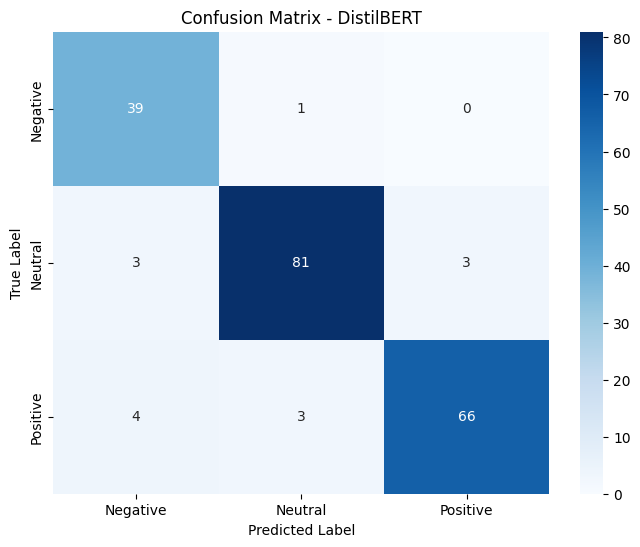

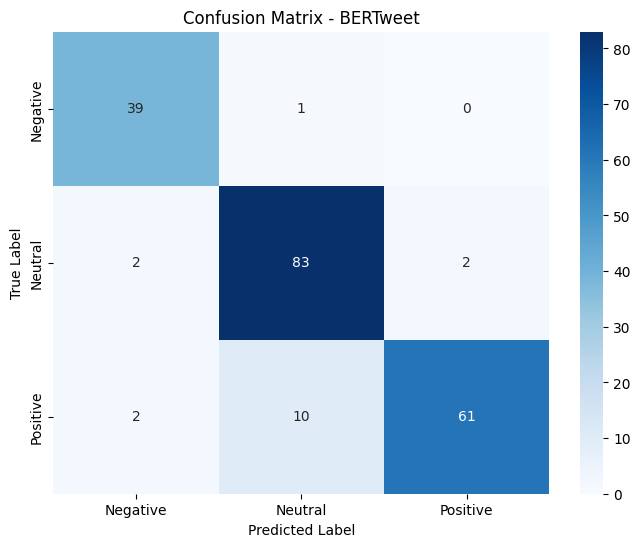

In [ ]:
# Display confusion matrices

import seaborn as sns
import matplotlib.pyplot as plt

# Display DistilBERT confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_distilbert, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix - DistilBERT")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Display BERTweet confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bertweet, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix - BERTweet")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Understanding Confusion Matrices**

A confusion matrix is a table that summarizes the performance of a classification model. It shows the counts of:

True Positives (TP): The model correctly predicted the positive class.

True Negatives (TN): The model correctly predicted the negative class.

False Positives (FP): The model incorrectly predicted the positive class (Type I error).

False Negatives (FN): The model incorrectly predicted the negative class (Type II error).

In my case, since I have three classes (Negative, Neutral, Positive), the confusion matrix will be a 3x3 grid. Each row represents the true class, and each column represents the predicted class.

### Error Distribution Plots

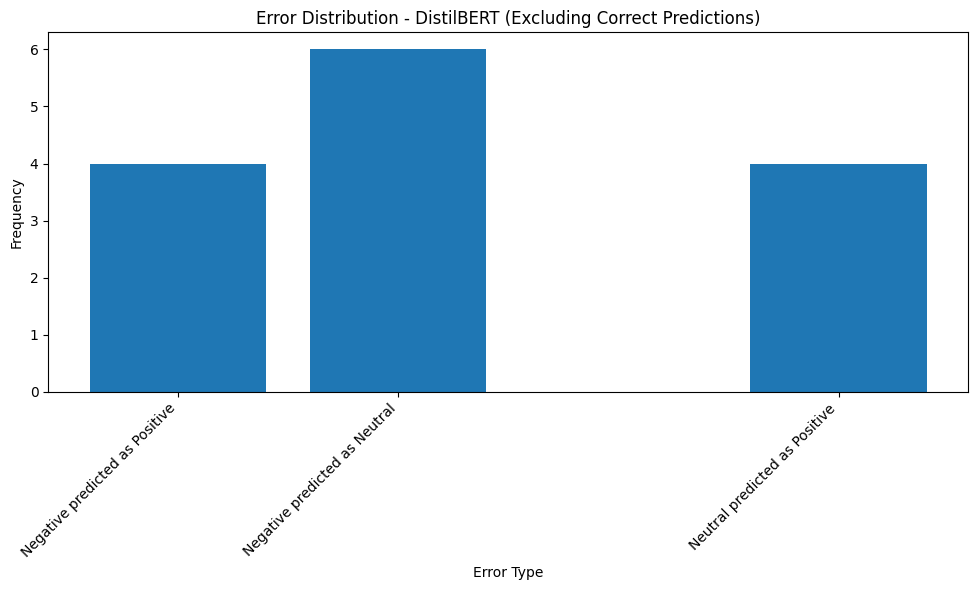

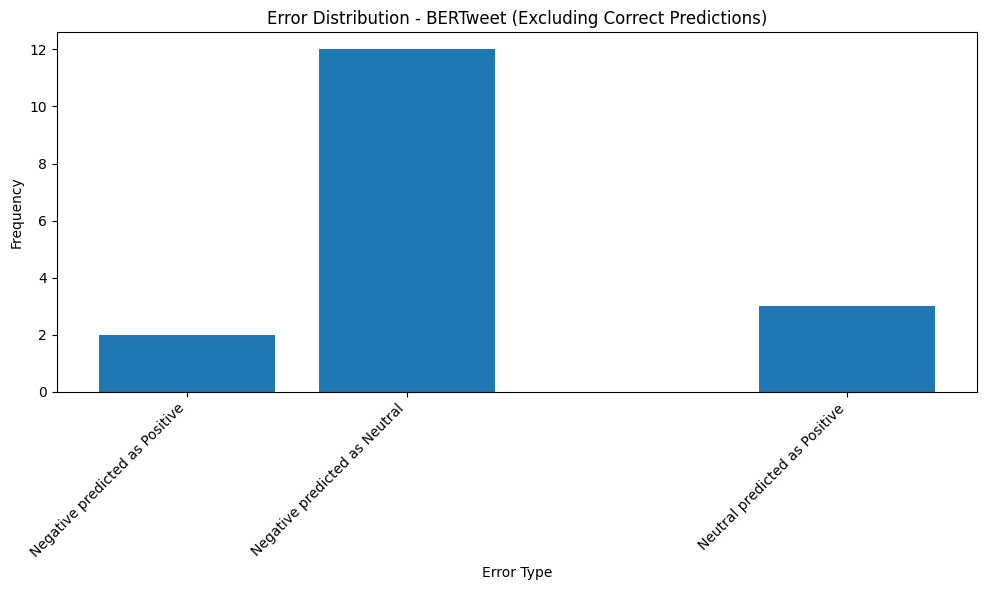

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already obtained predictions and true labels:
# predicted_labels_distilbert, predicted_labels_bertweet, true_labels

def plot_error_distribution(predicted_labels, true_labels, model_name):
    """Plots the error distribution for a given model, excluding correct predictions.

    Args:
        predicted_labels: Predicted labels from the model.
        true_labels: True labels from the dataset.
        model_name: Name of the model (e.g., "DistilBERT", "BERTweet").
    """

    # Calculate errors
    errors = predicted_labels - true_labels

    # Filter out correct predictions (errors == 0)
    mask = errors != 0
    errors = errors[mask]

    # Count occurrences of each error type (excluding correct predictions)
    unique_errors, counts = np.unique(errors, return_counts=True)

    # Error labels for the plot
    error_labels = {
        -2: "Negative predicted as Positive",
        -1: "Negative predicted as Neutral",
        1: "Neutral predicted as Positive",
        2: "Positive predicted as Negative",
    }

    # Create bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(unique_errors, counts, tick_label=[error_labels.get(err, str(err)) for err in unique_errors])
    plt.title(f"Error Distribution - {model_name} (Excluding Correct Predictions)")
    plt.xlabel("Error Type")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


# Plot error distribution for DistilBERT (excluding correct predictions)
plot_error_distribution(predicted_labels_distilbert, true_labels, "DistilBERT")

# Plot error distribution for BERTweet (excluding correct predictions)
plot_error_distribution(predicted_labels_bertweet, true_labels, "BERTweet")

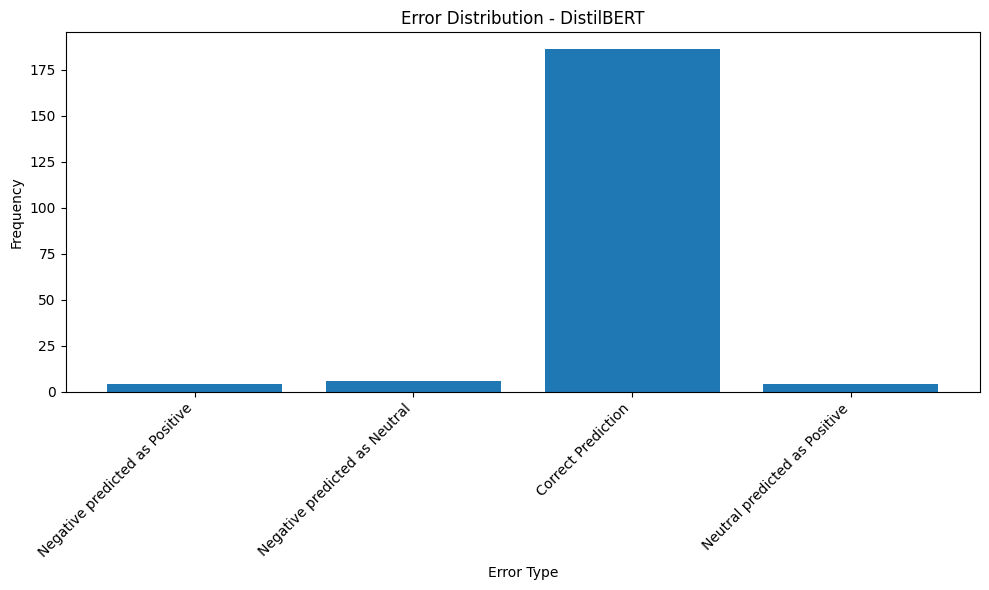

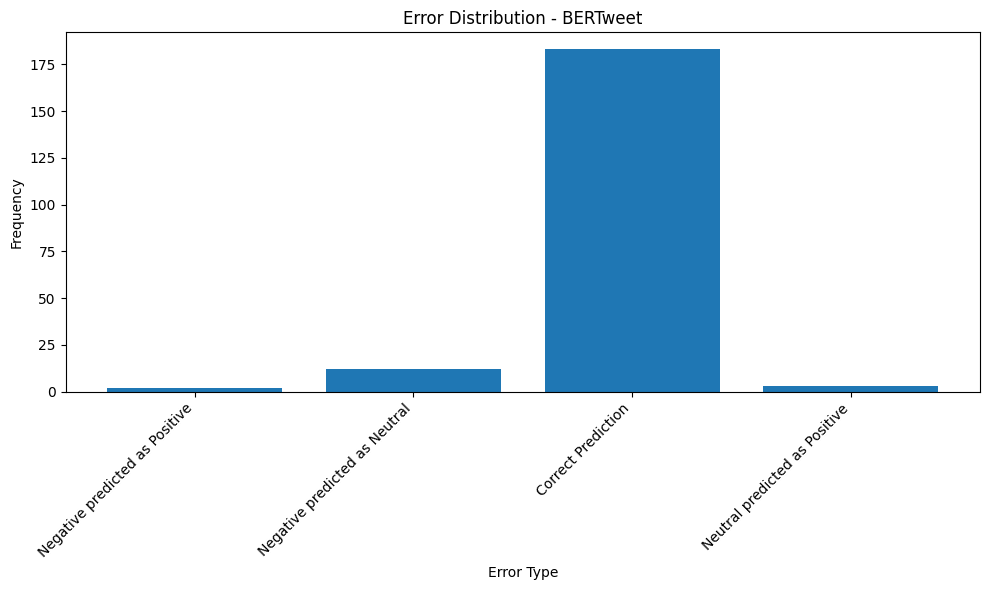

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already obtained predictions and true labels:
# predicted_labels_distilbert, predicted_labels_bertweet, true_labels

def plot_error_distribution(predicted_labels, true_labels, model_name):
  """Plots the error distribution for a given model.

  Args:
      predicted_labels: Predicted labels from the model.
      true_labels: True labels from the dataset.
      model_name: Name of the model (e.g., "DistilBERT", "BERTweet").
  """

  # Calculate errors
  errors = predicted_labels - true_labels  # Difference between predicted and true labels

  # Count occurrences of each error type
  unique_errors, counts = np.unique(errors, return_counts=True)

  # Error labels for the plot
  error_labels = {
      -2: "Negative predicted as Positive",
      -1: "Negative predicted as Neutral",
      0: "Correct Prediction",
      1: "Neutral predicted as Positive",
      2: "Positive predicted as Negative"  # Added this label
  }

  # Create bar chart
  plt.figure(figsize=(10, 6))
  plt.bar(unique_errors, counts, tick_label=[error_labels.get(err, str(err)) for err in unique_errors])
  plt.title(f"Error Distribution - {model_name}")
  plt.xlabel("Error Type")
  plt.ylabel("Frequency")
  plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping
  plt.show()


# Plot error distribution for DistilBERT
plot_error_distribution(predicted_labels_distilbert, true_labels, "DistilBERT")

# Plot error distribution for BERTweet
plot_error_distribution(predicted_labels_bertweet, true_labels, "BERTweet")

## Misclassified Samples

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, classification_report
import numpy as np

def show_misclassified_samples(trainer, dataset, original_dataset, dataset_name="test"):
    """
    Shows misclassified samples from the test set.

    Args:
        trainer: The Hugging Face Trainer object.
        dataset: The Hugging Face Dataset object for the test set (tokenized).
        original_dataset: The original Hugging Face Dataset object with the "text" column.
        dataset_name: The name of the dataset split (e.g., "test").
    """

    # Get predictions for the test set
    predictions = trainer.predict(dataset)
    preds = np.argmax(predictions.predictions, axis=1)  # Predicted labels
    labels = predictions.label_ids  # True labels

    # Find misclassified samples
    misclassified_indices = np.where(preds != labels)[0]

    # Print misclassified samples
    print(f"Misclassified Samples ({dataset_name} set):")
    for index in misclassified_indices:
        # Convert NumPy index to Python int
        index = int(index)

        # Access the original dataset to get the text
        text = original_dataset[index]["text"]  # Get the original text
        true_label = labels[index]
        predicted_label = preds[index]
        print(f"- Text: {text}")
        print(f"  True Label: {true_label}")
        print(f"  Predicted Label: {predicted_label}\n")

# Example usage with your Trainer and test set:
show_misclassified_samples(trainer_test_distilbert, tokenized_dataset['test'], hugface_dataset_dict['test'])
show_misclassified_samples(trainer_test_bertweet, tokenized_dataset_bertweet['test'], hugface_dataset_dict['test'])


Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.97      0.91        40
     Neutral       0.95      0.93      0.94        87
    Positive       0.96      0.90      0.93        73

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.93      0.93      0.93       200

Misclassified Samples (test set):
- Text: impact life health econom livelihood affect psycholog even
  True Label: 2
  Predicted Label: 1

- Text: hilari prank video polic maintain traffic control
  True Label: 1
  Predicted Label: 0

- Text: look like africa tomorrow must look inward solut wri
  True Label: 2
  Predicted Label: 1

- Text: kindli refund fine paid non file gst return
  True Label: 2
  Predicted Label: 0

- Text: covid19 china democrat pelosi obama biden berni etc never deter watch http
  True Label: 1
  Predicted Label: 0

- Text: know suddenli stop talk alert
  True Labe


Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.97      0.94        40
     Neutral       0.88      0.95      0.92        87
    Positive       0.97      0.84      0.90        73

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.91       200

Misclassified Samples (test set):
- Text: hilari prank video polic maintain traffic control
  True Label: 1
  Predicted Label: 0

- Text: look like africa tomorrow must look inward solut wri
  True Label: 2
  Predicted Label: 1

- Text: south africa eas lockdown may sahara report south africa contin highest numb
  True Label: 0
  Predicted Label: 1

- Text: almost young ir offic submit polici suggest reviv india economi post covid19 commit
  True Label: 2
  Predicted Label: 1

- Text: cognit disson reduc self exempt rationalis isol breacher favou
  True Label: 2
  Predicted Label: 1

- T